# Определение стоимости автомобилей

<div class="alert alert-info">
Привет! Меня зовут Позднякова Кристина. Я буду проверять твой проект. Предлагаю обращаться на «ты», но если так не удобно для тебя - дай знать, и мы перейдем на «вы»:). Моя основная цель проверки проекта — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь доработать код так, как хорошо было бы его писать в реальном рабочем проекте. Я вижу, что ты старался, делая проект. Все ключевые этапы в работе выполнены и соблюдены, так что в целом справиться с задачей тебе удалось.
    <br>    <br>
Есть только несколько небольших аспектов, которые требует твоего внимания. Комментарии по ним помечены красным цветом (❌). После доработки, с учетом этих моментов, проект будет принят. Осталось совсем немного, буду ждать твою работу на повторное ревью:) Зелёным цветом (✔️) отмечены хорошие, удачные и элегантные решения, на которые можно опираться в будущих проектах. Из контекста будет более понятно что хорошо, а что просто великолепно!:) Жёлтым цветом (⚠️) выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
    <br>    <br>
Давай работать над проектом взаимодействуя друг с другом: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом, пожалуйста. Выбери для своих комментариев какой-то заметный цвет, отличный от выбранных мной, так мне будет легче отследить изменения. В названии моих комментариев будет номер версии при повторном ревью. Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее:)

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. Нам предоставлены следующие исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-warning">
⚠️ Хорошая практика начинать проект с контекста, описания задачи как сделано выше. Так же хорошей практикой считается обозначения возможного хода\плана исследования, а также описания имеющихся данных. Очень надеюсь, что ты будешь уделять этому внимание и в последующих проектах!
</div>

# Содержание
* [Подготовка данных](#Подготовка-данных)
* [Обучение данных](#Обучение-данных)
* [Анализ моделей](#Анализ-моделей)

## Подготовка данных

In [252]:
# Загрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import Pool, CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [253]:
# Загрузим таблицу с данными
df = pd.read_csv('/datasets/autos.csv')

In [254]:
# Посмотрим на первые 10 строчек нашей таблицы
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Даже по первым строчкам видно, что в таблице имеются пропуски. Расшифруем названия признаков согласно документации:

*Признаки*

- DateCrawled — дата скачивания анкеты из базы;
- VehicleType — тип автомобильного кузова;
- RegistrationYear — год регистрации автомобиля;
- Gearbox — тип коробки передач;
- Power — мощность (л. с.);
- Model — модель автомобиля;
- Kilometer — пробег (км);
- RegistrationMonth — месяц регистрации автомобиля;
- FuelType — тип топлива;
- Brand — марка автомобиля;
- NotRepaired — была машина в ремонте или нет;
- DateCreated — дата создания анкеты;
- NumberOfPictures — количество фотографий автомобиля;
- PostalCode — почтовый индекс владельца анкеты (пользователя);
- LastSeen — дата последней активности пользователя.

*Целевой признак*

Price — цена (евро)

In [255]:
# Посмотрим на общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Мы видим, что неверный формат данных в столбцах с датами. А также имеются пропуски в некоторых столбцах. 

In [256]:
# Изменим формат данных в столбцах с датами
dates = ['DateCrawled', 'DateCreated', 'LastSeen']
for i in dates:
    df[i] = pd.to_datetime(df[i], format='%Y-%m-%d %H:%M:%S')

In [257]:
# Посмотрим на количество пропусков в каждом столбце
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

В данных имеется большое количество пропусков, поэтому их удаление может привести к искажению всей картины. В связи с этим заменим пропуски значением 'Unknown'.

In [258]:
df = df.fillna('unknown')

In [259]:
df = df.astype({"VehicleType":'category',
                                 "Gearbox":'category',
                                  "Model":'category',
                                  "FuelType":'category',
                                  "Brand":'category',
                                  "NotRepaired":'category'})

In [260]:
# Посмотрим на уникальные значения в столбцах с категориальными признаками
columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for i in columns:
    print(pd.DataFrame(data = df[i].unique(), columns=[i]))

   VehicleType
0      unknown
1        coupe
2          suv
3        small
4        sedan
5  convertible
6          bus
7        wagon
8        other
   Gearbox
0   manual
1     auto
2  unknown
          Model
0          golf
1       unknown
2         grand
3         fabia
4           3er
..          ...
246  elefantino
247          i3
248       kappa
249     serie_3
250     serie_1

[251 rows x 1 columns]
   FuelType
0    petrol
1  gasoline
2   unknown
3       lpg
4     other
5    hybrid
6       cng
7  electric
             Brand
0       volkswagen
1             audi
2             jeep
3            skoda
4              bmw
5          peugeot
6             ford
7            mazda
8           nissan
9          renault
10   mercedes_benz
11            opel
12            seat
13         citroen
14           honda
15            fiat
16            mini
17           smart
18         hyundai
19  sonstige_autos
20      alfa_romeo
21          subaru
22           volvo
23      mitsubishi
24     

В столбце FuelType встречается petrol и gasoline. Оба слова переводятся как "бензин" (gasoline - амер. вариант). Поэтому есть смысл заменить gasoline на petrol.

In [261]:
df = df.replace(['gasoline'], ['petrol'])

<div class="alert alert-success">
✔️ Да, верно, это можно объединить

In [262]:
# Посмотрим на другие параметры таблицы с помощью describe
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


В столбцах Price, RegistrationYear, Power и RegistrationMonth есть аномальные минимальные и максимальные значения, поэтому рассмотрим гистограммы каждого признака отдельно.

<div class="alert alert-success">
✔️ Верно замечено. Возможно еще Power могло попасть под подозрение

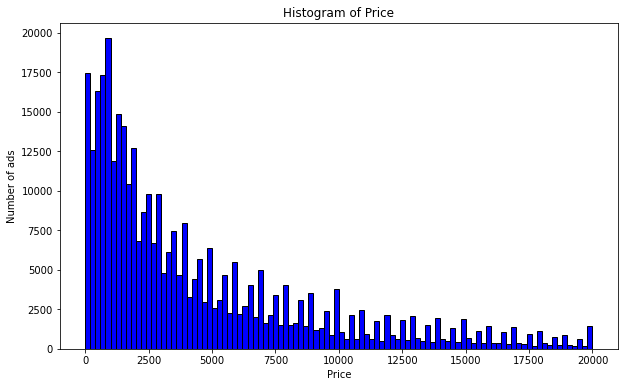

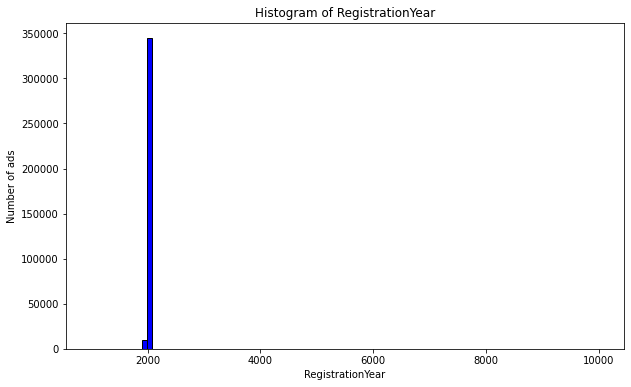

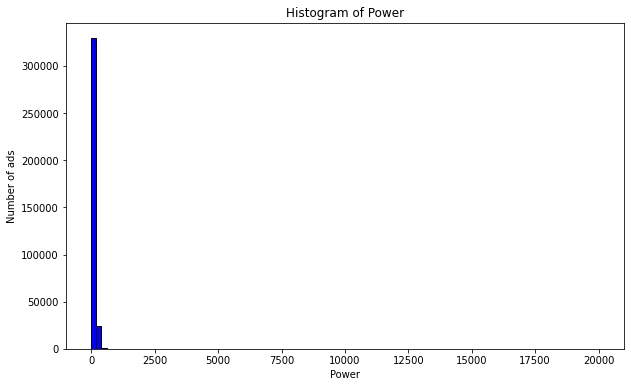

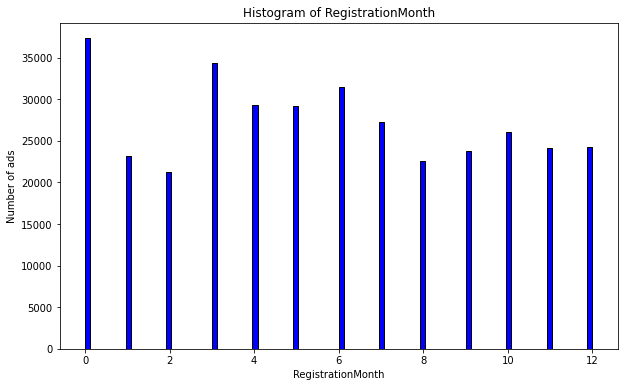

In [263]:
# Создадим список для дальнейшего создания функции построения гистограмм признаков
features_for_hist = ['Price', 'RegistrationYear', 'Power', 'RegistrationMonth']
for i in features_for_hist:
    plt.figure(figsize=(10, 6))
    plt.title('Histogram of '+ i)
    plt.xlabel(i)
    plt.ylabel('Number of ads')
    plt.hist(df[i], color='Blue', edgecolor='Black', bins=100)
    plt.show()

Цена автомобиля не может быть равна 0 евро. Поэтому оставим в таблице только значения больше 100 евро.

<div class="alert alert-success">
✔️ Вообще верное решение, правда хочу предложить посмотреть на этот момент с другой стороны: возможно кто-то и ставит из-за разных целей цену 0, например хочет договориться уже при общении, но нам скорее надо научиться угадывать не 0, а такие исключительные случаи могут повлиять на предсказания 

In [264]:
df = df[df['Price'] > 100]

В столбце RegistrationYear встречаются аномальные значения. Оставим период с 1900 по 2022 гг.

In [265]:
df = df.query('1900 < RegistrationYear < 2022')

<div class="alert alert-success">
✔️ 👍

Мощность двигателя не может быть равна 0 и больше 1600 л.с. (согласно обнаруженной в интернете информации). Поэтому оставим значения Power в этом диапазоне.

In [266]:
df = df.query('0 < Power <= 1600')

<div class="alert alert-success">
✔️ Power все же обрабатывается, супер:)

С месяцами ситуация сложнее - месяц регистрации анкеты не может нулевым, однако таких анкет больше всего. Оставим значения данного признака без изменений, чтобы не портить данные.

In [267]:
# Проверим данные на наличие дубликатов
df[df.duplicated() == True]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,petrol,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


Мы видим, что 4 объявления дублируются. Вероятность того, что они опубликованы разными людьми, очень мала, поэтому избавимся от них.

In [268]:
df = df.drop_duplicates().reset_index(drop=True)

**Вывод**

Таким образом, на первом этапе были изучены признаки. Был обнаружен ряд аномальных значений, которые были очищены для дальнейшего корректного обучения моделей. Также были заменены пропуски значением "unknown". На следующем этапе обучим несколько моделей для предсказания цены автомобилей.

<div class="alert alert-success">
✔️ В целом шаг выполнен верно, все ключевые этапы подготовки даннных соблюдены и выводы сделаны

<div class="alert alert-warning"> 
⚠️ По шагу я бы предложила в следующий раз попробовать:
    1. Изменить названия колонок в соответствии стандартам
    2. Возможно попробовать детальнее поработать с заполнением пропусков. Заполнить признак был ли в ремонте автомобиль например посмотрев этот признак в связке с годом выпуска, например. Возможно были бы интересная картина с помощью которой можно было бы заполнить пропуски. Или например мощность по среднему внутри бренда. Или из таких признаков, где много уникальных значений пробовать создавать новые признаки. На примере бренда автомобиля — можно создать признак is_expensive_brand и проставить 1 там, где по данным явно дорогие бренды, или is_popular_brand и сделать то же самое для основной массы брендов. Или можно выделить в этом же признаке до 10 (например) брендов самых популярных, а остальные отнести к значению others. Это может реально повлиять на качество обучения

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за совет насчет обработки пропусков. Как будет время, я обязательно детально поработаю с пропусками.</div>

<div class="alert alert-success">
    <b>Комментарий ревьюера v2</b>    <br>
 👍
Вот тут может быть найдешь идейки
    
http://www.machinelearning.ru/wiki/images/4/48/Methods_for_missing_value.pdf
    
https://loginom.ru/blog/missing

## Обучение моделей

Для обучения выберем следующие регрессионные модели:
1. LinearRegression.
2. DecisionTreeRegressor.
3. RandomForestRegressor.
4. LGBMRegressor.
5. CatBoostRegressor.

Перед началом обучения моделей уберем признаки, которые никак не повлияют на их качество:
- DateCrawled;
- RegistrationMonth;
- DateCreated;
- NumberOfPictures;
- PostalCode;
- LastSeen;
- Model;
- Brand.

In [269]:
df_new = df.drop(['DateCrawled', 
            'RegistrationMonth', 
            'DateCreated', 
            'NumberOfPictures', 
            'PostalCode', 
            'LastSeen',
            'Model',
            'Brand'], 
             axis=1)

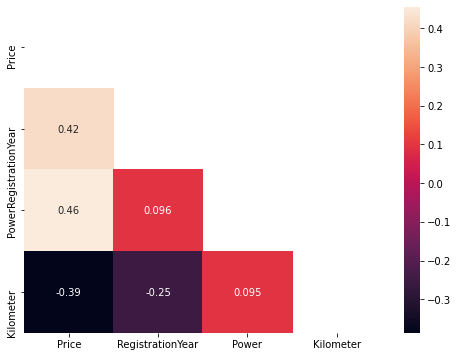

In [270]:
# Посмотрим на коррелирующие между собой числовые значения
matrix = np.triu(df_new.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(df_new.corr(), annot=True, mask=matrix)
plt.show()

Сильно коррелирующих признаков между собой нет, поэтому дополнительно ничего удалять не будем.

<div class="alert alert-success">
✔️ Верно

In [271]:
# Выделим целевой признак и признаки
target = df_new['Price']
features = df_new.drop(['Price'], axis=1)

Разделим выборку на обучающую и тестовую. Валидационную выборку выделять не будем, поскольку в дальнейшем применим кросс-валидацию.

In [272]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                            random_state=12345)

In [273]:
# Преобразуем категориальные признаки техникой OHE
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)

<div class="alert alert-success">
✔️❌ Нет разделения на валидацию. Если ли аргумент почему нет валидации? Учитывая обучение линейной регрессии в этой работе

<div class="alert alert-info"> <b>Комментарий студента:</b> Выделил валидационную выборку. На ней буду проверять скорость и качество моделей, а затем еще раз проверю лучшую модель на тестовой выборке.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Оставил 2 выборки.
</div>

<div class="alert alert-success">
    <b>Комментарий ревьюера v3</b>    <br>
✔️ Ниже понятно, то ты знаешь что это при GridSearchCV этого можно не делать, учитывая кросс-валидацию внутри

Поскольку линейная модель сильно реагирует на разный масштаб подаваемых в нее признаков, то стандартизируем данные функцией StandardScaler.

In [274]:
scaler = StandardScaler()
scaler.fit(features_train_ohe)
features_train_sc = scaler.transform(features_train_ohe)
features_test_sc = scaler.transform(features_test_ohe)

<div class="alert alert-success">
✔️ 👍

### Модель линейной регрессии

Начнем с модели линейной регрессии. Обучим ее.

In [275]:
LR = LinearRegression()
LR.fit(features_train_sc, target_train)

LinearRegression()

### Модель решающего дерева

Далее обучим модель решающего дереваи и подберем для нее оптимальные гиперпараметры.

In [276]:
DTR = DecisionTreeRegressor()

In [277]:
# Выпишем значения, в пределах которых будем искать оптимальное сочетание гиперпараметров
parametrs = {'criterion':['mse'],
            'max_depth': range(1, 13, 2),
            'random_state': [12345]}

In [278]:
# Найдем оптимальные гиперпараметры для нашей модели
grid_DTR = GridSearchCV(DTR, parametrs, scoring='neg_mean_squared_error')
grid_DTR.fit(features_train_sc, target_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 13, 2),
                         'random_state': [12345]},
             scoring='neg_mean_squared_error')

In [279]:
# Выведем результат
grid_DTR.best_params_

{'criterion': 'mse', 'max_depth': 11, 'random_state': 12345}

Лучшая модель получается при максимальной глубине дерева, равной 11.

<div class="alert alert-success">
✔️ 👍


### Модель случайного леса

Обучим модель решающего дереваи и подберем для нее оптимальные гиперпараметры.

In [280]:
RFR = RandomForestRegressor()

In [281]:
# Выпишем значения, в пределах которых будем искать оптимальное сочетание гиперпараметров
parametrs = {'criterion':['mse'],
            'n_estimators': range(10, 51, 10),
             'max_depth': range(1, 13, 2),
             'random_state': [12345]}

In [282]:
# Найдем оптимальные гиперпараметры для нашей модели
grid_RFR = GridSearchCV(RFR, parametrs, scoring='neg_mean_squared_error')
grid_RFR.fit(features_train_sc, target_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 51, 10),
                         'random_state': [12345]},
             scoring='neg_mean_squared_error')

In [283]:
# Выведем результат
grid_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'n_estimators': 50,
 'random_state': 12345}

Лучшая модель получается при максимальной глубине дерева, равной 11, и количестве деревьев, равного 50.

<div class="alert alert-success">
✔️ 👍


### LightGBM  модель

Обучим LightGBM модель и подберем для нее оптимальные гиперпараметры.

In [290]:
LGBMR = LGBMRegressor()

In [291]:
# Выпишем значения, в пределах которых будем искать оптимальное сочетание гиперпараметров
parametrs = {'num_leaves': [50, 100, 200],
             'learning_rate': [0.1, 0.5, 0.8],
             'random_state': [12345]}

In [293]:
# Найдем оптимальные гиперпараметры для нашей модели
grid_LGBMR = GridSearchCV(LGBMR, parametrs, scoring='neg_mean_squared_error')
grid_LGBMR.fit(features_train_sc, target_train)

KeyboardInterrupt: 

In [ ]:
# Выведем результат
grid_LGBMR.best_params_

Лучшая модель получается при learning_rate = 0.1 и num_leaves = 200.

<div class="alert alert-success">
✔️ 👍

### CatBoost  модель

Обучим CatBoost модель и подберем для нее оптимальные гиперпараметры.

In [294]:
CBR = CatBoostRegressor(cat_features=["Gearbox", "VehicleType", "FuelType", 'NotRepaired'])

In [295]:
# Выпишем значения, в пределах которых будем искать оптимальное сочетание гиперпараметров
parametrs = {'max_depth': range(1, 13, 2),
             'learning_rate':[0.1, 0.5, 0.8],
             'random_state':[12345],
             'verbose':[False]
             }

In [ ]:
# Найдем оптимальные гиперпараметры для нашей модели
grid_CBR = GridSearchCV(CBR, parametrs, scoring='neg_mean_squared_error')
grid_CBR.fit(features_train, target_train)

In [ ]:
# Выведем результат
grid_CBR.best_params_

Лучшая модель получается при learning_rate = 0.1 и max_depth = 11.

In [314]:
# Выпишем модели с наилучшими гиперпараметрами
best_DTR = DecisionTreeRegressor(criterion = 'mse', max_depth = 11, random_state =12345)
best_RFR = RandomForestRegressor(criterion = 'mse', n_estimators=50, max_depth = 11, random_state =12345)
best_LGBMR = LGBMRegressor(learning_rate=0.1, num_leaves=200, verbose_eval=False, random_state=12345)
best_CBR = CatBoostRegressor(learning_rate=0.1, max_depth=11, verbose=False, 
                             cat_features=["Gearbox", "VehicleType", "FuelType", 'NotRepaired'],
                             random_state=12345)

<div class="alert alert-success">
✔️❌ В обучении CatBoostRegressor не требуется кодирование категориальных признаков, точнее даже лучше не кодировать их, а в саму модель передать признаки, которые являются категориальными в параметр cat_features

<div class="alert alert-info"> <b>Комментарий студента:</b> Подскажи, пожалуйста, как мне добавить в fit cat_features, иначе выходит разная размерность данных. Просто получается, что категориальные признаки тоже надо будет делить на обучающую, валидационную и тестовую выборки, причем индексы всех признаков должны соответствовать друг другу. Как это возможно сделать?. Еще вопрос по поводу скоринга. Я использую везде neg_mean_squared_error, но это не совсем RMSE. Не мешает ли это в GridSearch подбирать оптимальные гиперпараметры?
</div>

<div class="alert alert-success">
    <b>Комментарий ревьюера v2</b>    <br>
✔️❌ 1. Смотри, тут не совсем верно получилось это сделать. Я возможно неверно объяснила, прошу прощения. Нужно создать список допустим, где будут перечислены названия колонок с категориальными признаками, а потом этот список указан в параметрах модели CatBoostRegressor вот так cat_features=название списка с именами колонок категориальных, это вот прям в параметры модели, еще до фита. И все. Но в обучение идет весь датасет. Вот как раньше было, просто в параметрах модели передан список с названиями колонок категориальных (незакодированных). Вот это давай исправим. Вот так например model = CatBoostRegressor(learning_rate=0.2, 
                                   max_depth=10, 
                                   n_estimators=100,
                                   cat_features=cf,
                                   verbose=25), где cf = ['vehicle_type', 
      'gearbox',
      'model',
      'fuel_type', 
      'brand', 
      'not_repaired']  допустим. Это не на примере твоего проекта<br> 
   2. На счет скоринга все окей    <br>
   3. На счет разделение выборки. В общем случилось недопонимание, потому что мне показалось что ты специально не выделял валидацию, потому что делаешь поиск параметров через GridSearchCV. Смотри в общем схема такая: если можешь обучается без GridSearchCV, то супер считается обучать на трейне, валидировать модель на валидации, а потом тестировать на тесте. Если ты делаешь GridSearchCV, то в целом валидацию можно не выделять, потому что там есть встроенная кросс-валидация и смысла свою держать особо нет. Это исправлять особо не надо в этом проекте

<div class="alert alert-info"> <b>Комментарий студента:</b> Разобрался с категориальными признаками для CatBoostRegressor (сделал так, как у меня написано в коде, потому что в случае использования cat_features внутри gridsearch появляется почему-то ошибка). Оставил только обучающую и тестовую выборки.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3</b>    <br>
✔️ Все верно получилось. На счет выборок да, когда используется GridSearchCV, можно и оставить два выборки, потому что там итак идет кросс-валидация. Я спрошивала думая что ты поэтому так и сделал, но просто линейная регрессия без GridSearchCV обучается...а тогда лучше на три все же.     <br>
   А на счет скоринга еще хочу добавить что есть еще такой, мне кажется он больше подойдет — ‘neg_root_mean_squared_error’

## Анализ моделей

После подбора оптимального сочетания гиперпараметров для пяти моделей проведем анализ скорости работы и качества каждой модели. Для этого напишем функцию, которая будет вычислять скорость обучения, предсказания, а также вычислять RMSE модели.

In [315]:
# Создадим функцию для вычисления времени обучения модели
def learn_time(model, train_features):
    start = time.time()
    model.fit(train_features, target_train)
    finish = time.time()
    fit_time = finish - start
    return fit_time

In [316]:
# Создадим функцию для вычисления времени предсказания модели
def predict_time(model, train_features, test_features):
    model.fit(train_features, target_train)
    start = time.time()
    predictions = model.predict(test_features)
    finish = time.time()
    pred_time = finish - start
    return pred_time

In [317]:
# Создадим функцию для вычисления RMSE
def RMSE(model, train_features, test_features):
    model.fit(train_features, target_train)
    predictions = model.predict(test_features)
    RMSE =(mean_squared_error(target_test, predictions))**0.5
    return RMSE

In [318]:
print('Время обучения модели линейной регрессии:', learn_time(LR, features_train_sc))
print('Время обучения модели решающего дерева:', learn_time(best_DTR, features_train_sc))
print('Время обучения модели случайного леса:', learn_time(best_RFR, features_train_sc))
print('Время обучения LightGBM  модели:', learn_time(best_LGBMR, features_train_sc))
print('Время обучения CatBoost модели:', learn_time(best_CBR, features_train))
print('---------------------------------------------------------------')
print('Время предсказания модели линейной регрессии:', predict_time(LR, features_train_sc, features_test_sc))
print('Время предсказания модели решающего дерева:', predict_time(best_DTR, features_train_sc, features_test_sc))
print('Время предсказания модели случайного леса:', predict_time(best_RFR, features_train_sc, features_test_sc))
print('Время предсказания LightGBM  модели:', predict_time(best_LGBMR, features_train_sc, features_test_sc))
print('Время предсказания CatBoost модели:', predict_time(best_CBR, features_train, features_test))
print('---------------------------------------------------------------')
print('RMSE модели линейной регрессии:', RMSE(LR, features_train_sc, features_test_sc))
print('RMSE модели решающего дерева:', RMSE(best_DTR, features_train_sc, features_test_sc))
print('RMSE модели случайного леса:', RMSE(best_RFR, features_train_sc, features_test_sc))
print('RMSE LightGBM  модели:', RMSE(best_LGBMR, features_train_sc, features_test_sc))
print('RMSE CatBoost модели:', RMSE(best_CBR, features_train, features_test))

Время обучения модели линейной регрессии: 0.37746381759643555
Время обучения модели решающего дерева: 0.787614107131958
Время обучения модели случайного леса: 22.824202060699463
Время обучения LightGBM  модели: 141.89595246315002


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 4255.2155102	total: 958ms	remaining: 15m 56s
1:	learn: 3961.4221679	total: 1.85s	remaining: 15m 21s
2:	learn: 3709.6727970	total: 2.75s	remaining: 15m 14s
3:	learn: 3486.2815298	total: 3.79s	remaining: 15m 44s
4:	learn: 3287.5754822	total: 4.88s	remaining: 16m 12s
5:	learn: 3112.2288106	total: 5.75s	remaining: 15m 52s
6:	learn: 2959.3458303	total: 6.82s	remaining: 16m 7s
7:	learn: 2826.4455043	total: 7.96s	remaining: 16m 27s
8:	learn: 2708.4166225	total: 9.12s	remaining: 16m 44s
9:	learn: 2606.6591979	total: 10.2s	remaining: 16m 46s
10:	learn: 2521.2963194	total: 11.2s	remaining: 16m 45s
11:	learn: 2446.0474199	total: 12.2s	remaining: 16m 40s
12:	learn: 2383.1898973	total: 13s	remaining: 16m 26s
13:	learn: 2327.1657720	total: 13.9s	remaining: 16m 19s
14:	learn: 2280.8455020	total: 15s	remaining: 16m 23s
15:	learn: 2240.7742585	total: 15.9s	remaining: 16m 16s
16:	learn: 2206.2077583	total: 16.8s	remaining: 16m 12s
17:	learn: 2175.1302325	total: 17.7s	remaining: 16m 7s
18:	lear

KeyboardInterrupt: 

**Вывод**

В процессе исследования были обучены 5 моделей: линейной регрессии, решающего дерева, случайного леса и две модели градиентного бустинга. Исследование показало, что чем дольше модель обучает и предсказывает, тем выше ее качество. По времени обучения и предсказания модели можно расположить в следующем порядке, начиная с самой быстрой модели:
1. Модель линейной регрессии.
2. Модель решающего дерева.
3. Модель случайного леса.
4. LightGBM  модель.
5. CatBoost модель.

По качеству они располагаются в обратном порядке, начиная с CatBoost модели. Взяв в расчет все измерения, для предсказания стоимости автомобилей лучше всего использовать модель решающего дерева. Данная модель гораздо быстрее остальных, кроме линейной регрессии. К тому же по качеству она несильно уступает модели случайного леса.

<div class="alert alert-success">
✔️❌ Модель не выбрана для проекта в итоге. То есть та, которая по критериям лучшая и которую можно предложить использовать в этой задачи. Возможно предложена, возможно вывод сформулирован не совсем ясно. Напиши, пожалуйста, какую модель выдвигаешь в призеры и почему:)

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделаю после того, как разберусь с CatBoosting.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Выбрал итоговую модель.
</div>

<div class="alert alert-success">
    <b>Комментарий ревьюера v3</b>    <br>
✔️ Да, все логично и понятно👍 

## Чек-лист проверки

<div class="alert alert-warning"> 
⚠️ Не хватает итогового вывода по всей работе. Это достаточно важный этап в работе. В итоговом выводе мы описываем основные действия в работе и итоги. Поэтому не забывай уделять им особое внимание в последующих проектах. Так же в целом можно развиваться в направлении выводов например по метрикам, именно как расшифровка значения результата, работе модели, по признакам и зависимостям и тд

<div class="alert alert-success">
✔️ Работа хороша! Рассуждения и решения верные, очень логичные и осмысленные. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Уверенно пользуешься pandas, пишешь хорошие функции, работаешь с моделями и метриками с пониманием. Делаешь четкие обоснованные выводы. Работа аккуратная и комментарии по ходу работы всегда очень уместны!   <br>    <br>
    Осталось исправить всего несколько пунктов:    <br>
    1. Разбивка данных на три выборки или обосновать почему тут можно не разбивать;    <br>
    2. Категориальные признаки добавить в CatBoostRegressor;    <br>
    3. Выбрать итоговую модель    <br>    <br>
    
Жду твоих исправлений :)      <br>

<div class="alert alert-success">
<b>Комментарий ревьюера v3</b>    <br>
Отлично поработали, спасибо тебе за это! Получилась суперская работа! Желаю тебе удачи в стараниях) Уверена что у тебя все получится!

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей